In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 2)

In [ ]:
channel = 2402e6    # 2402 MHz  = ble channel 37 for advertising
sc_f0 = 2.0e6       # 2 MHz     = subcarrier frequency 0
sc_f1 = 2.6e6       # 2.6 MHz   = subcarrier frequency 1
cf = 2399.7e6       # 2399.7MHz = carrier frequency, channel - mean(sc_f0, sc_f1)
bit_rate = 1e6      # 1 Mbps    = data rate

tmax = 0.1          # 0.1 secs  = time period to model
fsps = 20e6         # 20 Msps   = rx/tx sampling rate to model

N = round(tmax * fsps)
t = np.linspace(0, N, N)
bit_period = 1 / bit_rate
bit_samps = round(fsps / bit_rate)

### Subcarrier (010101...)

In [ ]:
sc = np.zeros(N)

for i in range(round(N / bit_samps)):
    f = 0
    if (i % 2 == 0):
        f = sc_f0
    else:
        f = sc_f1

    l = round(i * bit_samps)
    r = round((i + 1) * bit_samps)
    sc[l:r] = (1 + np.sign(np.sin(np.pi + 2 * np.pi * f / fsps * t[0:bit_samps]))) // 2

(0.0, 100.0)

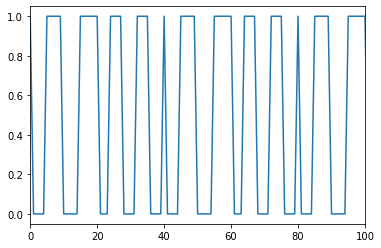

In [ ]:
plt.plot(sc)
plt.xlim(0,bit_samps * 5)

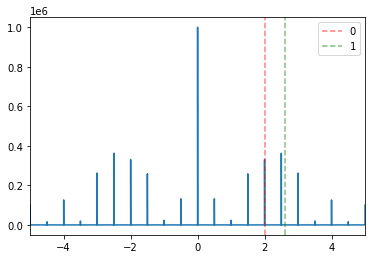

In [ ]:
nyquist = fsps / 2
freqs = np.linspace(- nyquist, nyquist, N)
fft = np.fft.fftshift(np.fft.fft(sc))
plt.plot(freqs / 1e6, np.abs(fft))
plt.axvline(x=2, color='red', linestyle='--', alpha=0.5, label="0")
plt.axvline(x=2.6, color='green', linestyle='--', alpha=0.5, label="1")
plt.xlim(-5, 5)
plt.legend()

### Carrier
(no plots since `cf` >> `fsps`)

In [ ]:
c = np.sin(2 * np.pi * cf / fsps * t)

### Backscattered Signal: Mixing
(no plots since `cf` >> `fsps`)

In [ ]:
bx = sc * c

### Downconversion

In [ ]:
dbx = bx * np.exp(-2j * np.pi * t * cf / fsps)

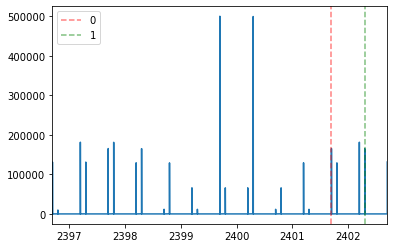

In [53]:
nyquist = fsps / 2
freqs = np.linspace(cf-nyquist, cf+nyquist, N)
fft = np.fft.fftshift(np.fft.fft(dbx))
plt.plot(freqs/1e6, np.abs(fft))
plt.axvline(x=cf/1e6+2, color='red', linestyle='--', alpha=0.5, label="0")
plt.axvline(x=cf/1e6+2.6, color='green', linestyle='--', alpha=0.5, label="1")
plt.xlim(cf/1e6-3, cf/1e6+3)
plt.legend()